In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting 
import matplotlib.pyplot as plt
%matplotlib inline 

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

# to visialise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Load dataset
# We load the datasets with the engineered values: we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous lecture / notebook to find out hou to create these datasets
X_train = pd.read_csv('xtrain.csv', index_col=0)
X_test = pd.read_csv('xtest.csv', index_col=0)

X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.978261,0.950000,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.972727,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.972727,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.630435,0.933333,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.536364,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.536364,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.963768,0.916667,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.954545,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,0.954545,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.913043,0.800000,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.890909,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.890909,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.666667,0.233333,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.581818,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.581818,0.666667,0.75,0.0,0.0,0.0


In [3]:
# capture the target
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [4]:
# load selected features
# we selected the features in the previous lecture / notebook
# if you haven't done so,, go agead and visit the previous lecture to find out how to select
# the features

features = pd.read_csv('selected_features.csv', header=None, index_col=False)
features = [x for x in features[0]]

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
# part of the course.

features = features + ['LotFrontage']
features = features[1:]
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [5]:
# reduce the train and test set to the desired features
X_train = X_train[features]
X_test = X_test[features]

# 3.2 Regularised linear regression
Remember to set the seed.

In [6]:
# train the model
lin_model = Lasso(alpha=.005, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [7]:
# evaluate the model:
# remember that we log transformed the output (SalePrice) in out feature engineering notebook / lecture.
# In ourder to get the true prefomance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate perfomance using the mean squared error and the
# root of the mean squared error

pred = lin_model.predict(X_train)
print(f'linear train mse: {mean_squared_error(np.exp(y_train), np.exp(pred))}')
print(f'linear train mse: {sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))}')
print()
pred = lin_model.predict(X_test)
print(f'linear test mse: {mean_squared_error(np.exp(y_test), np.exp(pred))}')
print(f'linear test mse: {sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))}')
print()
print('Average house price:', np.exp(y_train).median())

linear train mse: 1087050173.75223
linear train mse: 32970.443942298225

linear test mse: 1403585729.4125733
linear test mse: 37464.459550520325

Average house price: 163000.00000000012


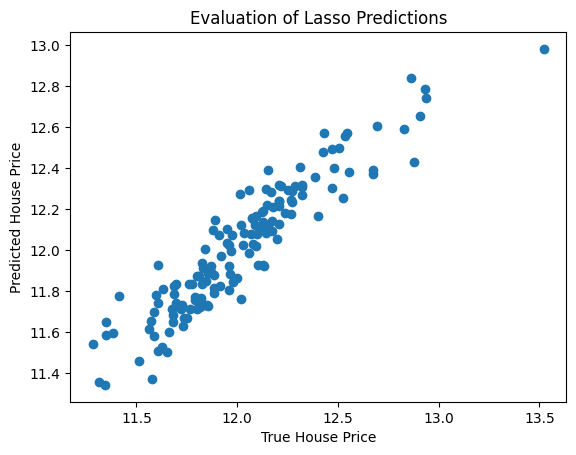

In [9]:
# Let's evaluate our predictions respet to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions');

# 3.3 Feature importance

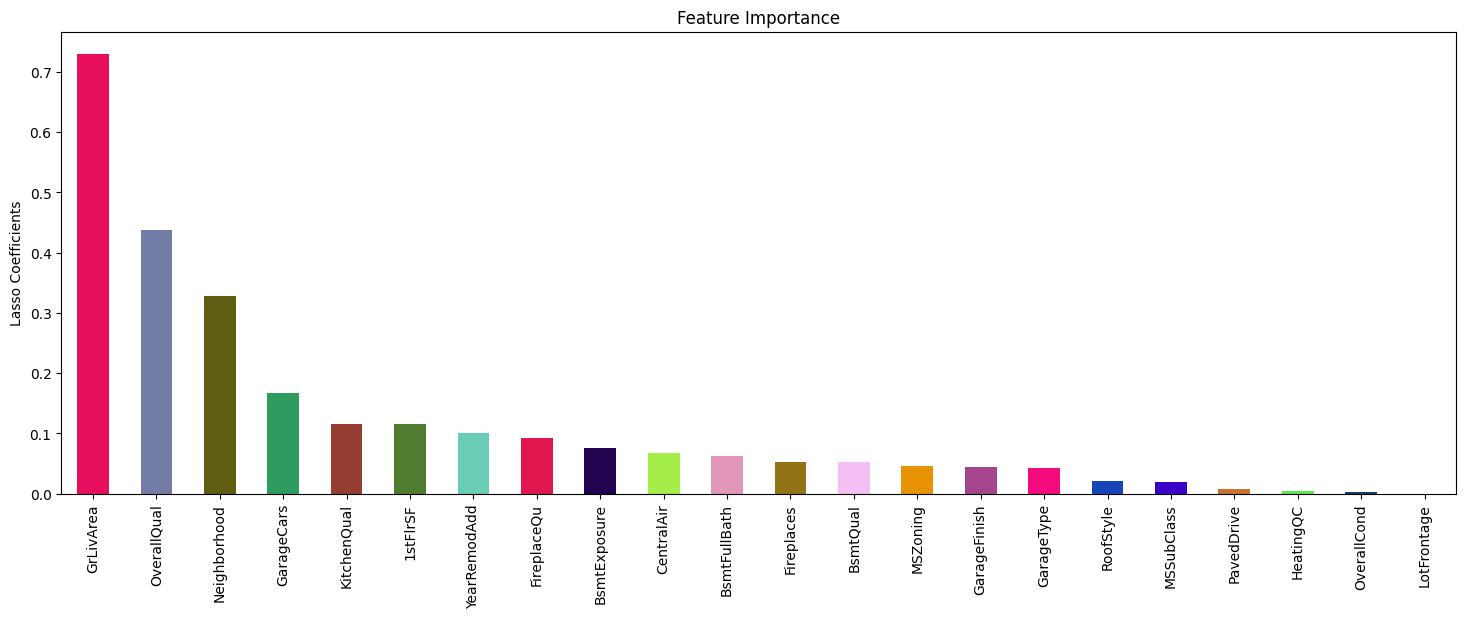

In [16]:
# Finally, hust for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6), color=np.random.rand(len(importance), 3))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance');